In [1]:
import json
import yaml
import fitz
import numpy as np

In [29]:
from doctr.models import ocr_predictor
model = ocr_predictor(det_arch="db_resnet50",reco_arch="master",pretrained=True)

C:\Users\SriHarsha\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
C:\Users\SriHarsha\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [28]:
from doctr.io  import DocumentFile
pdf_doc = DocumentFile.from_pdf('../../Downloads/drylab.pdf')

In [3]:
img_file = DocumentFile.from_images('../../Downloads/ocr_test.png')

In [5]:
result = model(img_file)

C:\Users\SriHarsha\AppData\Roaming\Python\Python311\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [6]:
output = result.export()

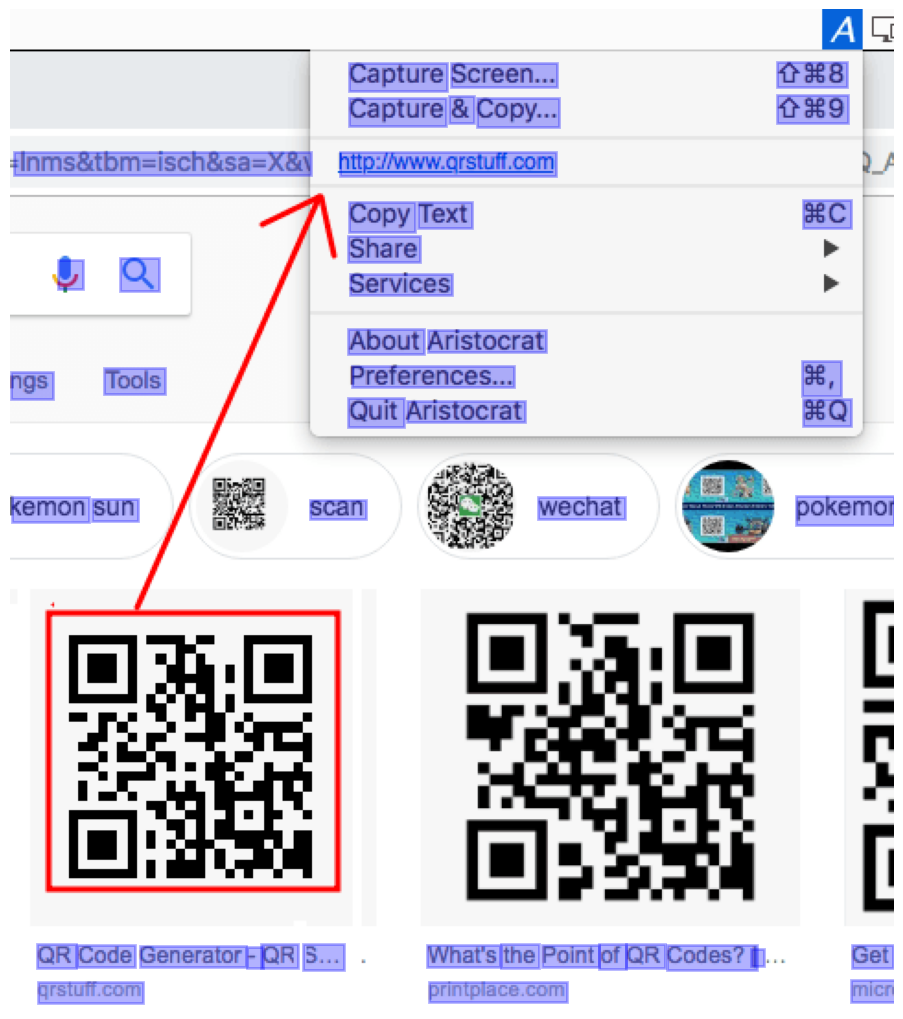

In [8]:
result.show(img_file)


In [94]:
import torch
from doctr.models.obj_detection import faster_rcnn
model = faster_rcnn.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True)

In [95]:
from doctr.io.image import read_img_as_tensor


In [96]:
img_path = "../../Downloads/bar_chart.jpg"

In [97]:
img = read_img_as_tensor(img_path=img_path).unsqueeze(0)

In [98]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
            (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (1): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(16

In [99]:
with torch.no_grad():
    pred = model(img)

In [100]:

pred


[{'boxes': tensor([[ 65.3930, 301.6210, 120.7339, 383.2598],
          [128.9075, 269.5880, 189.0416, 388.9705],
          [ 23.3512, 143.6262,  88.7911, 197.6516],
          [437.0191, 330.2108, 493.2593, 388.1504],
          [191.9484, 238.3864, 243.9545, 391.6456]]),
  'labels': tensor([3, 3, 3, 3, 3]),
  'scores': tensor([0.9246, 0.7271, 0.6975, 0.6680, 0.5040])}]

In [101]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
CLASSES = ["__background__", "QR Code", "Barcode", "Logo", "Photo"]
CM = [(255, 255, 255), (0, 0, 150), (0, 0, 0), (0, 150, 0), (150, 0, 0)]

In [102]:

def plot_predictions(image, boxes, labels):
    for box, label in zip(boxes, labels):
        # Bounding box around artefacts
        cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]),
                      CM[label], 2)
        text_size, _ = cv2.getTextSize(CLASSES[label], cv2.FONT_HERSHEY_SIMPLEX, 2, 2)
        text_w, text_h = text_size
        # Filled rectangle above bounding box
        cv2.rectangle(image, (box[0], box[1]), (box[0] + text_w, box[1] - text_h),
                      CM[label], -1)
        # Text bearing the name of the artefact detected
        cv2.putText(image, CLASSES[label], (int(box[0]), int(box[1])),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3)
    figure(figsize=(10, 8), dpi=90)
    plt.axis('off')
    plt.imshow(image)
    plt.show()

torch.Size([1, 3, 408, 612])
torch.Size([3, 408, 612])


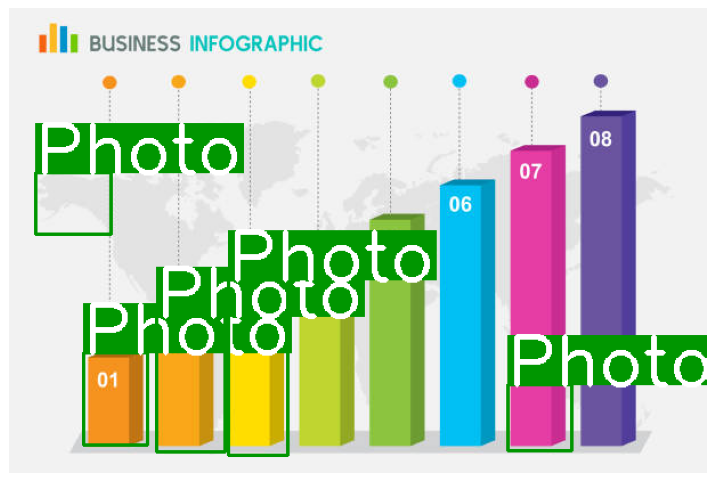

In [103]:
labels = pred[0]['labels'].detach().cpu().numpy()
labels = labels.round().astype(int)
boxes = pred[0]['boxes'].detach().cpu().numpy()
boxes = boxes.round().astype(int)
print(img.shape)
print(img[0].shape)
img = (255 * img.cpu().squeeze(0).permute(1, 2, 0).numpy().copy()).round().astype(np.uint8)
plot_predictions(img, boxes, labels)

In [4]:
model.eval()
with torch.no_grad():
    model(pdf_doc)

AttributeError: 'numpy.ndarray' object has no attribute 'dim'

In [39]:
from doctr.io import DocumentFile
pdf_file = DocumentFile.from_pdf('../../Downloads/021813s000_SumR.pdf')

In [40]:
len(pdf_file)

13

In [41]:
file_arr = np.array(pdf_file)

In [42]:
file_arr.shape

(13, 1584, 1224, 3)

In [48]:
first_page  = file_arr[6]

In [44]:
first_page.shape

(1584, 1224, 3)

In [14]:
import torch
from doctr.models.obj_detection import faster_rcnn
model = faster_rcnn.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True)

C:\Users\SriHarsha\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\SriHarsha\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\SriHarsha\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained_backbone' is deprecated since 0.13 and may be removed in the future, please use 'weights_backbone' instead.
  warnings.warn(
C:\Users\SriHarsha\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights_back

In [56]:
import pandas as pd
first_page[0].shape
df = pd.DataFrame(first_page[0])

In [16]:
t1 = torch.from_numpy(first_page)

In [18]:
first_page.shape

(1684, 1191, 3)

In [19]:
first_page[0].shape

(1191, 3)

In [27]:
np.set_printoptions(precision=1000)
print(first_page)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [58]:
(df == 255).all()

0    True
1    True
2    True
dtype: bool